In [477]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [478]:
# Import Numpy library to work with arrays
import numpy as np
# Import pandas library to work with data sets
import pandas as pd
# Import Matplotlib library to create 2D graphs and plots
import matplotlib.pyplot as plt
# Import Axes3D class to create 3D plots
from mpl_toolkits.mplot3d import Axes3D
# Import LabelEncoder to convert categorical variables, represented as strings, into numerical values
from sklearn.preprocessing import LabelEncoder
# Import StandardScaler class to standardize the columns of a dataset by subtracting the mean and dividing by the standard deviation
from sklearn.preprocessing import StandardScaler
# Import Lasso class which is a linear regression algorithm that uses L1 regularization
from sklearn.linear_model import Lasso
# Import mean_squared_error, r2_score functions to calculate the mean squared error and to calculate the coefficient of determination respectively
from sklearn.metrics import mean_squared_error, r2_score
# Import PCA module from the sklearn library to perform PCA
from sklearn.decomposition import PCA
# Import Seaborn library for drawing attractive and informative statistical graphics
import seaborn as sns
# Import train_test_split function to split a dataset into two parts
from sklearn.model_selection import train_test_split
# Import LogisticRegression class for binary classification problems
from sklearn.linear_model import LogisticRegression
# Import accuracy_score function to evaluate the performance of a binary classification model
from sklearn.metrics import accuracy_score

#**Part-I**: Multiple Linear Regression:

##**1. Data Understanding, Cleaning and Transformation:**

Understand what is data about and why do you think the data was collected, and what research questions
data can answers. 

**(a) You can explain your logic in the text cell of your notebook.<br>**


According to my understanding the data contains information about video games and it includes things like rankings, game genres, sales numbers in different places, and who made the game. This information can help answer questions like: which games sold the most, what types of games are popular, and does where the game is sold affect its sales.


**(b) Based on your research questions Identify Dependent and Independent Variables.<br>**


Based on the information provided, the global sales of video games are a dependent variable on this data, and we are attempting to predict it. On the other hand, independent variables include the rank, name, platform, genre, publishers, NA, JP, and other sales, all of which have an impact on the global sales of video games.

**(c) Use pandas to load your dataset and observe the data.**

In [479]:
# Read CSV file
df = pd.read_csv('/content/drive/MyDrive/Regression Portfolio/7.csv')
# Set the maximum number of columns to be displayed to "None", hence all columns will be shown
pd.options.display.max_columns = None
# Show the dataframe
df

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


If required perform basic data cleaning and Transformation the way you fits your task requirements.

In [480]:
# Determining whether the dataset has any missing values
df.isnull().sum()

Rank             0
Name             0
Platform         0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [481]:
# Display data from start
df.head()

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [482]:
# Display data from end
df.tail()

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


##**2. Data Analysis and Visualization:**

Find the descriptive statistics of your data using pandas and use matplotlib or any other library to make
various plots to generate insights from dataset.

To generate better insights from the data make visualization and plot of your Independent variable against
Dependent variable.

In [483]:
# Generate descriptive statistics of the DataFrame
df.describe()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,41.490000,29.020000,10.220000,10.570000,82.740000


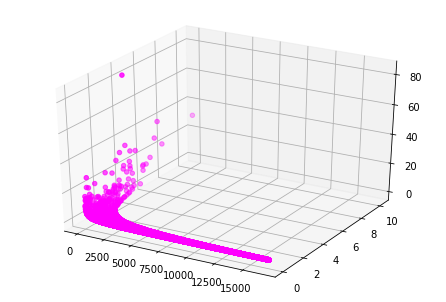

In [484]:
# Create a 3D figure object
figure = plt.figure()
# Add a 3D axis to the figure
axis = Axes3D(figure)
# Create a scatter plot
axis.scatter(df['Rank'], df['JP_Sales'], df['Global_Sales'], color='#FF00FF')
# Display the plot
plt.show()

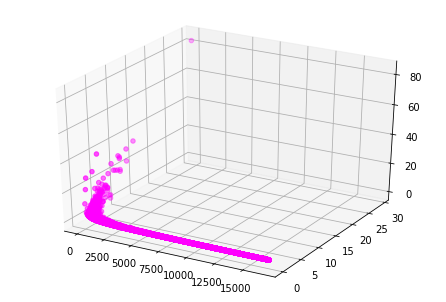

In [485]:
# Create a 3D figure object
figure = plt.figure()
# Add a 3D axis to the figure
axis = Axes3D(figure)
# Create a scatter plot
axis.scatter(df['Rank'], df['EU_Sales'], df['Global_Sales'], color='#FF00FF')
# Display the plot
plt.show()

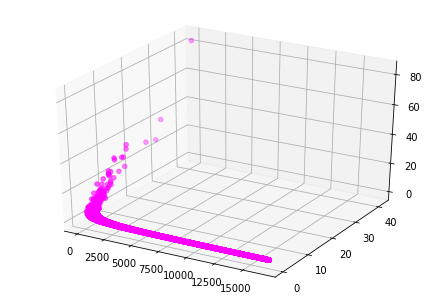

In [486]:
# Create a 3D figure object
figure = plt.figure()
# Add a 3D axis to the figure
axis = Axes3D(figure)
# Create a scatter plot
axis.scatter(df['Rank'], df['NA_Sales'], df['Global_Sales'], color='#FF00FF')
# Display the plot
plt.show()

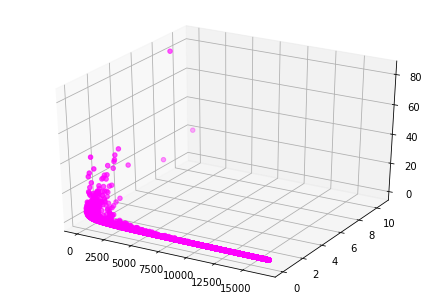

In [487]:
# Create a 3D figure object
figure = plt.figure()
# Add a 3D axis to the figure
axis = Axes3D(figure)
# Create a scatter plot
axis.scatter(df['Rank'], df['Other_Sales'], df['Global_Sales'], color='#FF00FF')
# Display the plot
plt.show()

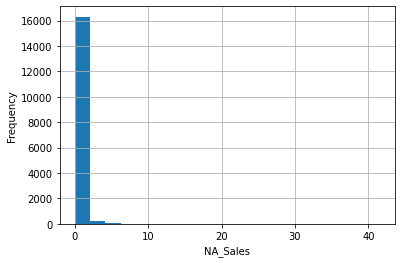

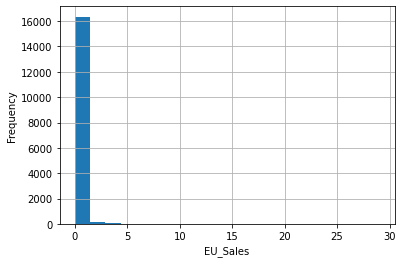

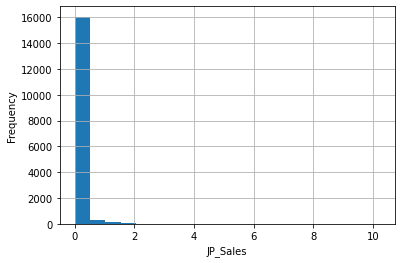

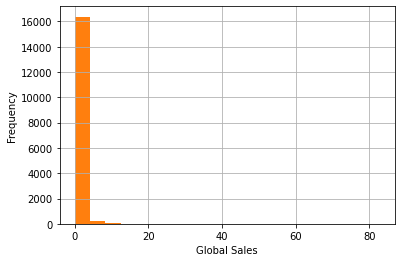

In [488]:
# List of columns to be created
columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
# Loop through the columns list and plot a histogram for each column
for column in columns:
    plt.figure()
    df[column].hist(bins=20)
    plt.xlabel(column)
    plt.ylabel('Frequency')
# Plot a histogram for the Global_Sales column
df['Global_Sales'].hist(bins=20)    
# Label x and y respectively
plt.xlabel('Global Sales')
plt.ylabel('Frequency')
# Show the plot
plt.show()

##**3. Build Primary Model[Multiple Linear Regression]:**

In [489]:
# Determining whether the dataset has any missing values
df.isnull()

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
16593,False,False,False,False,False,False,False,False,False,False
16594,False,False,False,False,False,False,False,False,False,False
16595,False,False,False,False,False,False,False,False,False,False
16596,False,False,False,False,False,False,False,False,False,False


In [490]:
# Create an instance of the LabelEncoder class
number = LabelEncoder()
# Convert columns into numeric values to perform machine learning as string or object values can't be fed
df['Platform'] = number.fit_transform(df['Platform'].astype('str'))
df['Genre'] = number.fit_transform(df['Genre'].astype('str'))
df['Publisher'] = number.fit_transform(df['Publisher'].astype('str'))
# Show the dataframe
df

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,26,10,359,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,11,4,359,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,26,6,359,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,26,10,359,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,5,7,359,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,6,4,269,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,7,8,241,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,16,6,21,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,4,5,8,0.00,0.01,0.00,0.00,0.01


Once you have cleaned, transformed and Visualize your data build Multiple Linear Regression Model from
Scratch.

### Storing the arrays in the Matrix Form:
Implement Following Equations:

\begin{align}
        \mathbf{Y} = \theta^T X + \theta_0
    \end{align}
In Machine Learning parameters $\theta$ are also called weights, so from this step onwards we represent $\theta$ as $\textbf{W}$.

Here-Now:
\begin{align}
        \mathbf{Y} = W^T X + W_0
    \end{align}

\begin{align}
        \mathbf{W} = [\theta_o, \theta_1, ...., \theta_n]^T
    \end{align}
\begin{align}
        \mathbf{X} = [x_o, x_1, ...., x_n]^T
    \end{align}

In [491]:
# Create an instance of StandardScaler
scaler = StandardScaler()
# Scale the columns of the dataframe
df[['Rank', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']] = scaler.fit_transform(df[['Rank', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']])
# Arrays being stored as a matrix
X = np.array(df[['Platform','Genre', 'NA_Sales', 'EU_Sales', 'Publisher', 'Other_Sales']])
Y = np.array(df['Global_Sales'])
# Using Lasso Regression with Regularization
reg = Lasso(alpha=0.1)
reg.fit(X, Y)
# Utilizing the model to predict the values of Y
Y_pred = reg.predict(X)
# Model Evaluation - RMSE
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
print("Root Mean Squared Error:", rmse)
# Model Evaluation - R2 Score
r2 = r2_score(Y, Y_pred)
print("R Squared Error:", r2)

Root Mean Squared Error: 0.2925894665254572
R Squared Error: 0.9645947920391902


## Step-2: Implement a Error/Cost Function.

We will use the Cost function: Mean Square Error i.e.
\begin{align}
        \mathbf{J(\theta)}  = \frac{1}{2m} \sum_{i=1}^m(y_{pred} - y_i)^2
    \end{align}

Further Simplifications:

\begin{align}
        \mathbf{J(\theta)}  = \frac{1}{2m} \sum_{i=1}^m(h_\theta(x_i) - y_i)^2
    \end{align}
Here:
\begin{align}
  h_\theta = \theta_1*x 
    \end{align}

Note:
In Machine Learning, m: denotes the length of the array (total No of rows in our case).


In [492]:
def cost_function(X, Y, W):
  """ Parameters:
  This function finds the Mean Square Error.
  Input parameters:
  X: Feature Matrix
  Y: Target Matrix
  W: Weight Matrix
  Output Parameters:
  J: accumulated mean square error.
  """
  m = len(Y) # len of data in your datasets
  J = np.sum((X.dot(W) - Y) ** 2)/(2 * m)
  return J
  x0 = np.ones(len(df))
  X = np.array([x0, df['Rank'], df['NA_Sales'], df['EU_Sales'], df['JP_Sales'], df['Other_Sales']]).T
  Y = np.array(df['Global_Sales'])
  W = np.array([0, 0, 0, 0, 0, 0])
  initial_cost = cost_function(X, Y, W)
  print(initial_cost)

## Step-3: Optimization Algorithm

Our goal in this task is to minimize our error function with each input of examples(input data). 
One of the most suitable methods to do the same is 
\begin{align}
$\color{red}{\textbf{GRADIENT DESCENT ALGOROTHIM.}}$
\end{align}

Implement GDA from Scratch.

Function to estimate: 
  *   $h_\theta(x) = \theta^T x$

Loss function to minimize:
  *   $(h_\theta(x) - y)^2$

Gradient: Decsent update:
  *   $\theta_(j+1)   = \theta_j - LR(D_\theta)$
  *   $D(\theta) = 1/m * (\theta^T * X)$ i.e. Derivative of parameters/weights.





In [493]:
def gradient_descent(X, Y, W, alpha, iterations):
    """
    Parameters:
    This function performs gradient descent on the given data to find the optimal weights for the linear regression model.
    Input parameters:
      X: Feature Matrix
      Y: Target Matrix
      W: Weight Matrix
      alpha: learning rate
      iterations: number of iterations for gradient descent
    Output Parameters:
      W_update: optimized weight matrix
      cost_history: history of cost values at each iteration
    """
    m = len(Y)
    cost_history = [0] * iterations
    
    for iteration in range(iterations):
        # Hypothesis Values
        Y_pred = X.dot(W)
        # Difference between Hypothesis and Actual Y
        loss = Y_pred - Y
        # Gradient Calculation
        dW = (X.T.dot(loss) ) / (m)
        # Changing Values of W using Gradient
        W_update = W - alpha * dW
        # New Cost Value
        cost = cost_function(X, Y, W_update)
        cost_history[iteration] = cost
        
    return W_update, cost_history

In [494]:
def cost_function(X, Y, W):
  """ Parameters:
  This function finds the Mean Square Error.
  Input parameters:
  X: Feature Matrix
  Y: Target Matrix
  W: Weight Matrix
  Output Parameters:
  J: accumulated mean square error.
  """
  m = len(Y) # len of data in your datasets
  J = np.sum((X.dot(W) - Y) ** 2)/(2 * m)
  return J

x0 = np.ones(len(df))
X = np.array([x0, df['Rank'], df['NA_Sales'], df['EU_Sales'], df['JP_Sales'], df['Other_Sales']]).T
Y = np.array(df['Global_Sales'])
#w are set to values zero to optimise the process with gradient algorithm
W = np.array([0, 0, 0, 0, 0, 0])

initial_cost = cost_function(X, Y, W)
print("Initial Cost: ", initial_cost)

# 100000 Iterations
alpha = 0.0001 # Learning Rate.
new_weights, cost_history = gradient_descent(X, Y, W, alpha, 100000)
# New Values of
print("Optimized Weights: ", new_weights)

# Final Cost of our Iterations.
print("Final Cost: ", cost_history[-1])

Initial Cost:  1.3534043258223882
Optimized Weights:  [ 5.37440656e-05 -6.64609194e-05  1.46331085e-04  1.40389262e-04
  9.51361562e-05  1.16364032e-04]
Final Cost:  1.352694237922864


##**4. Model Evaluation:**

Pick an appropriate evaluation metric to evaluate your model on the test set.

In [495]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    """
    This Function calculates the Root Mean Squre.
    Input Arguments:
        Y: Array of actual(Target) Dependent Varaibles.
        Y_pred: Array of predeicted Dependent Varaibles.
    Output Arguments:
        rmse: Root Mean Square.
    """
    rmse = np.sqrt(np.mean((Y - Y_pred) ** 2))
    return rmse

# Model Evaluation - R2
def r2(Y, Y_pred):
  """
  This Function calculates the R Squared Error.
  Input Arguments:
  Y: Array of actual(Target) Dependent Variables.
  Y_pred: Array of predicted Dependent Variables.
  Output Arguments:
  rsquared: R Squared Error.
  """
  mean_y = np.mean(Y)
  ss_tot = np.sum((Y - mean_y) ** 2)
  ss_res = np.sum((Y - Y_pred) ** 2)
  r2 = 1 - (ss_res / ss_tot)
  return r2

In [496]:
# Initialize the target variable as numpy array
Y = np.array(df['Global_Sales'])
# Calculate the predicted values of Y
Y_pred = X.dot(W)
# Calculate the root mean squared error and the R2 score respectively
rmse_value = rmse(Y, Y_pred)
r2_value = r2(Y, Y_pred)
# Print the root mean squared error value and R2 score respectively
print("RMSE:", rmse_value)
print("R2:", r2_value)

RMSE: 1.6452381747469806
R2: -0.11945678106098212


##**5. Dimensionality Reduction:**

Apply Principal Component Analysis to reduce the dimension and rebuild the model with reduced fea-
tures,evaluate the model and Compare the output with the evaluation from step 4.

In [497]:
# Initializing the PCA
pca = PCA(n_components=3)

# Fitting the PCA to the data
X_reduced = pca.fit_transform(X)

# Storing the arrays in Matrix form
X = X_reduced
Y = np.array(df['Global_Sales'])

# Using Lasso Regression with Regularization
reg = Lasso(alpha=0.1)
reg.fit(X, Y)

# Predicting the values of Y using the model
Y_pred = reg.predict(X)

# Model Evaluation - RMSE
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
print("Root Mean Squared Error:", rmse)

# Model Evaluation - R2 Score
r2 = r2_score(Y, Y_pred)
print("R Squared Error:", r2)


Root Mean Squared Error: 0.3052122870402905
R Squared Error: 0.9614740105083633


##**6. Conclusion:**

##**Conclude the result of the comparison.**

It may be stated that the value was predicted rather accurately based on the Root Mean Squared Error of 0.305 and the R Squared Error of 0.962. Therefore, PCA was useful for decreasing dimensionality and improving model accuracy.

#**Part-II: Logistic Regression:**

##**1. Data Understanding, Cleaning and Transformation:**

Understand what is data about and why do you think the data was collected, and what research questions
data can answers.

##(a) You can explain your logic in the text cell of your notebook.



Based on my interpretation of the data, it seems to consist of information regarding Pokemon, such as their types, overall health, attack, defense, special attack and special defense. The variables "Legendary" and "Type 1" seem to be ordinal in nature, meaning they need to be encoded prior to utilizing them in machine learning.

##(b) Based on your research questions Identify Dependent and Independent Variables.

According to the data, "Legendary" is the dependent variable, while the independent factors appear to be "Number," "Type 1," "Total," "HP," "Attack," "Defense," "Special Attack," "Special Defense," "Speed," and "Generation," all of which seem to have a large influence on the "Legendary" status.

##(c) Use pandas to load your dataset and observe the data.

In [498]:
# Read CSV file
df2 = pd.read_csv('/content/drive/MyDrive/Regression Portfolio/2.csv')
# Set the maximum number of columns to be displayed to "None", hence all columns will be shown
pd.options.display.max_columns = None
# Show the dataframe
df2

,number,type1,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Grass,318,45,49,49,65,65,45,1,False
1,2,Grass,405,60,62,63,80,80,60,1,False
2,3,Grass,525,80,82,83,100,100,80,1,False
3,3,Grass,625,80,100,123,122,120,80,1,False
4,3,Grass,525,80,82,83,100,100,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...
1067,896,Ice,580,100,145,130,65,110,30,8,True
1068,897,Ghost,580,100,65,60,145,80,130,8,True
1069,898,Psychic,500,100,80,80,80,80,80,8,True
1070,898,Psychic,680,100,165,150,85,130,50,8,True


##If required perform basic data cleaning and Transformation the way you fits your task requirements.

In [499]:
# Return data types of the columns 
df2.dtypes

number         int64
type1         object
total          int64
hp             int64
attack         int64
defense        int64
sp_attack      int64
sp_defense     int64
speed          int64
generation     int64
legendary       bool
dtype: object

In [500]:
# Create a dictionary to map the types to numbers
type_mapping = {'Grass': 1, 'Fire': 2, 'Water': 3, 'Blastoise': 4, 'Bug': 5, 'Normal': 6, 'Dark': 7, 
                'Poison': 8, 'Electric': 9, 'Ground': 10, 'Ice': 11, 'Fairy': 12, 'Fighting': 13,
                'Psychic': 14, 'Rock': 15, 'Ghost': 16, 'Dragon': 17, 'Steel': 18}

# Use the map() function to apply the mapping to each element in the column
df2['type1_num'] = df2['type1'].map(type_mapping)

In [501]:
# Define a dictionary that maps the values True and False to 1 and 0
legendary_mapping = {True: 1, False: 0}
# Create a new column in the DataFrame called 'legendary_num' that maps the values of the 'legendary' column
df2['legendary_num'] = df2['legendary'].map(legendary_mapping)
# Show the dataframe
df2

,number,type1,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary,type1_num,legendary_num
0,1,Grass,318,45,49,49,65,65,45,1,False,1.0,0
1,2,Grass,405,60,62,63,80,80,60,1,False,1.0,0
2,3,Grass,525,80,82,83,100,100,80,1,False,1.0,0
3,3,Grass,625,80,100,123,122,120,80,1,False,1.0,0
4,3,Grass,525,80,82,83,100,100,80,1,False,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,896,Ice,580,100,145,130,65,110,30,8,True,11.0,1
1068,897,Ghost,580,100,65,60,145,80,130,8,True,16.0,1
1069,898,Psychic,500,100,80,80,80,80,80,8,True,14.0,1
1070,898,Psychic,680,100,165,150,85,130,50,8,True,14.0,1


##**2. Data Analysis and Visualization:**

Find the descriptive statistics of your data using pandas and use matplotlib or any other library to make
various plots to generate insights from dataset.

In [502]:
# Generate descriptive statistics of the DataFrame
df2.describe()

,number,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,type1_num,legendary_num
count,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1062.000000,1072.000000
mean,445.219216,440.885261,70.486940,80.938433,74.968284,73.273321,72.476679,68.792910,4.294776,8.288136,0.110075
std,267.772806,121.379077,26.868039,32.463582,31.208059,32.643119,27.934253,30.076281,2.346472,5.270070,0.313129
min,1.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,0.000000,1.000000,0.000000
25%,209.750000,330.000000,50.000000,56.000000,52.000000,50.000000,50.000000,45.000000,2.000000,3.000000,0.000000
50%,442.500000,460.500000,68.000000,80.000000,70.000000,65.000000,70.000000,65.000000,4.000000,7.000000,0.000000
75%,681.250000,519.250000,84.000000,100.000000,90.000000,95.000000,90.000000,90.000000,6.000000,13.000000,0.000000
max,898.000000,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000,8.000000,18.000000,1.000000


To generate better insights from the data make visualization and plot of your Independent variable against
Dependent variable.

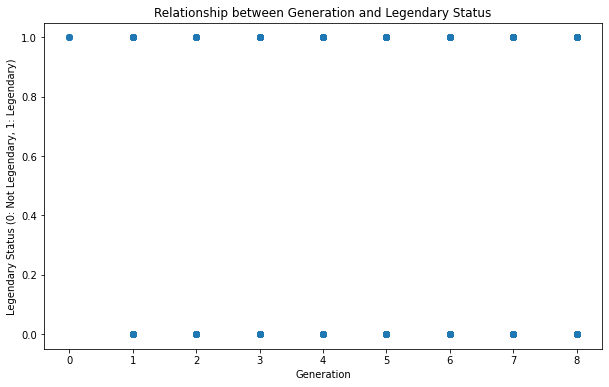

In [503]:
# Create a figure with width 10 inches and height 6 inches
plt.figure(figsize=(10, 6))
# Plot a scatter plot of the 'generation' column on the x-axis and the 'legendary_num' column on the y-axis
plt.scatter(df2['generation'], df2['legendary_num'])
# Set x-axis label and y-axis label 
plt.xlabel('Generation')
plt.ylabel('Legendary Status (0: Not Legendary, 1: Legendary)')
# Set the title of the plot
plt.title('Relationship between Generation and Legendary Status')
# Show the plot
plt.show()

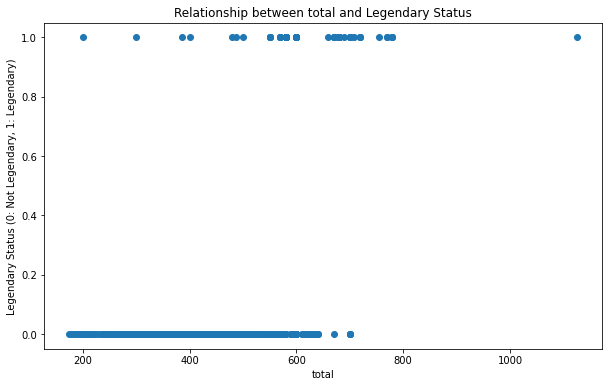

In [504]:
# Create a figure with width 10 inches and height 6 inches
plt.figure(figsize=(10, 6))
# Plot a scatter plot of the 'total' column on the x-axis and the 'legendary_num' column on the y-axis
plt.scatter(df2['total'], df2['legendary_num'])
# Set x-axis label and y-axis label 
plt.xlabel('total')
plt.ylabel('Legendary Status (0: Not Legendary, 1: Legendary)')
# Set the title of the plot
plt.title('Relationship between total and Legendary Status')
# Show the plot
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


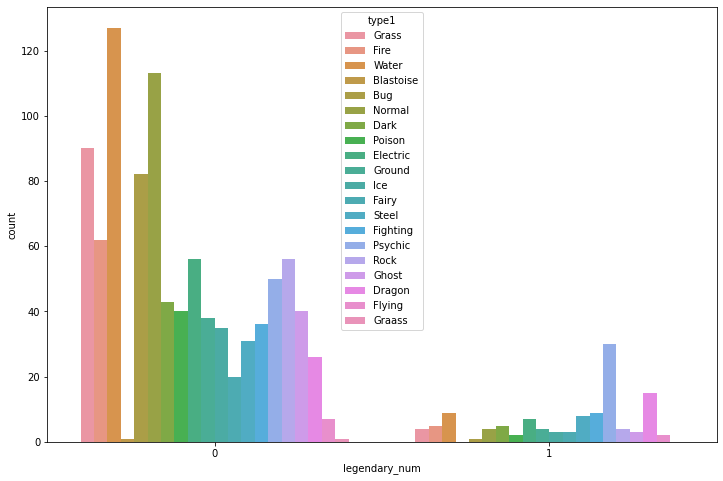

In [505]:
# Create a subplot with a width of 12 inches and a height of 8 inches
fig,ax = plt.subplots(figsize=(12,8))
# Create a countplot
sns.countplot(df2.legendary_num,hue=df2["type1"],ax=ax)
# Show the plot
plt.show()

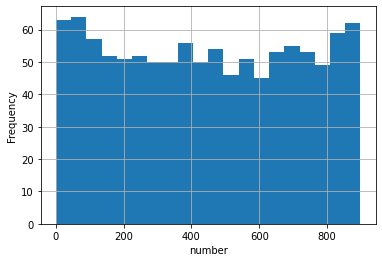

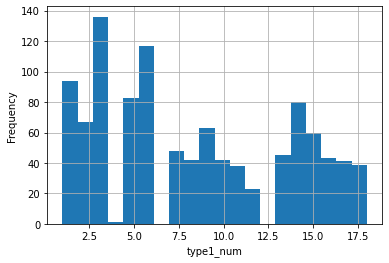

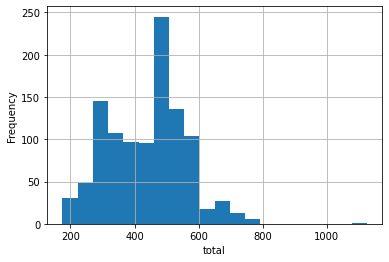

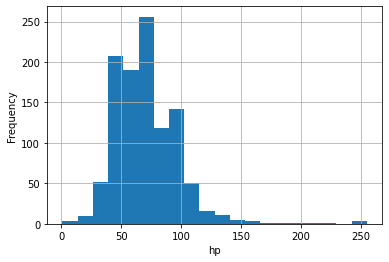

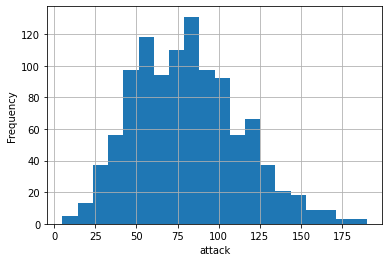

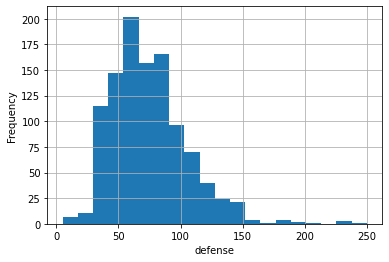

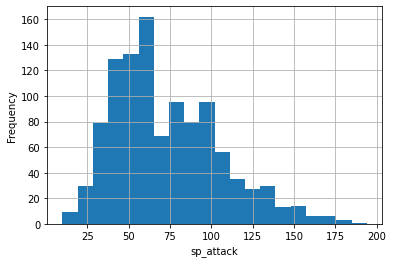

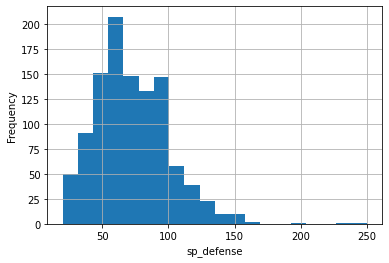

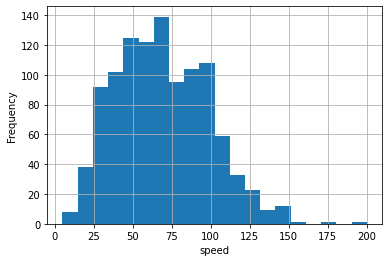

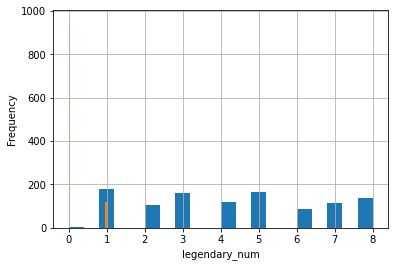

In [506]:
# List of columns to be created
columns = ['number', 'type1_num', 'total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'generation']
# Loop through the columns list and plot a histogram for each column
for column in columns:
    plt.figure()
    df2[column].hist(bins=20)
    plt.xlabel(column)
    plt.ylabel('Frequency')
# Plot a histogram for the legendary_num column
df2['legendary_num'].hist(bins=20)
# Label x and y respectively
plt.xlabel('legendary_num')
plt.ylabel('Frequency')
# Show the plot
plt.show()

In [507]:
# Drop column 'type1' since it has ordinal datas and above we have already created 'type1_num' column which contains data in numerical format
df2 = df2.drop("type1", axis=1)

In [508]:
# Drop column 'legendary' since it has ordinal datas and above we have already created 'legendary_num' column which contains data in numerical format
df2 = df2.drop('legendary', axis=1)

In [509]:
# Normalize the values in the DataFrame
df2 = (df2 - df2.min()) / (df2.max() - df2.min())
df2

,number,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,type1_num,legendary_num
0,0.000000,0.150526,0.173228,0.237838,0.179592,0.298913,0.195652,0.205128,0.125,0.000000,0.0
1,0.001115,0.242105,0.232283,0.308108,0.236735,0.380435,0.260870,0.282051,0.125,0.000000,0.0
2,0.002230,0.368421,0.311024,0.416216,0.318367,0.489130,0.347826,0.384615,0.125,0.000000,0.0
3,0.002230,0.473684,0.311024,0.513514,0.481633,0.608696,0.434783,0.384615,0.125,0.000000,0.0
4,0.002230,0.368421,0.311024,0.416216,0.318367,0.489130,0.347826,0.384615,0.125,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1067,0.997770,0.426316,0.389764,0.756757,0.510204,0.298913,0.391304,0.128205,1.000,0.588235,1.0
1068,0.998885,0.426316,0.389764,0.324324,0.224490,0.733696,0.260870,0.641026,1.000,0.882353,1.0
1069,1.000000,0.342105,0.389764,0.405405,0.306122,0.380435,0.260870,0.384615,1.000,0.764706,1.0
1070,1.000000,0.531579,0.389764,0.864865,0.591837,0.407609,0.478261,0.230769,1.000,0.764706,1.0


##**3. Build Primary Model[Logistic Regression]:**

Once you have cleaned, transformed and Visualize your data build Logistic Regression Model from Scratch.

In [510]:
# Replace NaN values with the mean of the respective column
df2.fillna(df2.mean(), inplace=True)

# Split the data into features and target variables
x = df2.drop("legendary_num",axis=1)
y = df2["legendary_num"]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Create a logistic regression model
lr = LogisticRegression()

# Fit the model with the training data
lr.fit(x_train, y_train)

# Evaluate the model on the test data
print(lr.score(x_test, y_test))

0.9209302325581395


In [511]:
# Create an instance of logistic regression model
lr = LogisticRegression()
# Train the test data
lr.fit(x_train,y_train)
# Print accuracy score
print(lr.score(x_test,y_test)) 

0.9209302325581395


Therefore, 92% is the KNN score, which appears to be a good result for the trained model.

##**4. Model Evaluation:**

Pick an appropriate evaluation metric to evaluate your model on the test set.

In [512]:
# Evaluate the accuracy of the model
y_pred = lr.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9209302325581395


##**5. Dimensionality Reduction:**

Apply Principal Component Analysis to reduce the dimension and rebuild the model with reduced fea-
tures,evaluate the model and Compare the output with the evaluation from step 4.

In [513]:
# Initialize the PCA class and fit it to the data
pca = PCA()
pca.fit(x)
# Transform the original data into a lower-dimensional representation
x_reduced = pca.transform(x)
# Split the reduced data and the target variable into training and testing sets
x_train_reduced, x_test_reduced, y_train, y_test = train_test_split(x_reduced, y, test_size=0.2, random_state=1)
# Initialize a logistic regression classifier and fit it to the training data
lr = LogisticRegression()
lr.fit(x_train_reduced, y_train)
# Evaluate the performance of the model on the test data
print(lr.score(x_test_reduced, y_test))
# Predict the target variable for the test data
y_pred = lr.predict(x_test_reduced)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Compare the accuracy of the model before and after dimensionality reduction
if accuracy > accuracy:
    print("After utilizing PCA to reduce the amount of features, the accuracy has improved.")
else:
    print("After utilizing PCA to reduce the amount of features, the accuracy has not improved.")

0.9209302325581395
Accuracy: 0.9209302325581395
After utilizing PCA to reduce the amount of features, the accuracy has not improved.


##**6. Conclusion:**

Conclude the result of the comparison.

The results suggest that the accuracy of the logistic regression model was unaffected by lowering the number of features using PCA. The accuracy score remained constant, which indicates that the reduced features still capture the important information needed to make predictions.